### Importación de datos



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [33]:
ingreso1=tienda1["Precio"].sum()
ingreso2=tienda2["Precio"].sum()
ingreso3=tienda3["Precio"].sum()
ingreso4=tienda4["Precio"].sum()
ingresos=[ingreso1,ingreso2,ingreso3,ingreso4]
ingresos

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

In [34]:
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

In [35]:
df_ingresos = pd.DataFrame(
    list(zip(nombres_tiendas, ingresos)),
    columns=["Tienda", "Ingreso Total"]
)
df_ingresos.set_index("Tienda", inplace=True)
df_ingresos

,Ingreso Total
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [36]:
# Cambiando el nombre de la columna "Categoría del Producto" a "Categoría"
for tienda in [tienda1, tienda2, tienda3, tienda4]:
    tienda.rename(columns={'Categoría del Producto': 'Categoría'}, inplace=True)


In [39]:
venta1 = tienda1.Categoría.value_counts()
venta1

,count
Categoría,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [40]:
lista_tiendas = [tienda1, tienda2, tienda3, tienda4]
ventas_categorias = []

In [41]:
for i in range(len(lista_tiendas)):

    conteo = lista_tiendas[i]["Categoría"].value_counts().reset_index()
    conteo.columns = ["Categoría", nombres_tiendas[i]]

    ventas_categorias.append(conteo)

In [42]:
df_ventas_categorias = ventas_categorias[0]

for i in range(1, len(ventas_categorias)):
    df_ventas_categorias = df_ventas_categorias.merge(ventas_categorias[i],
                              on="Categoría",
                              how="outer")

df_ventas_categorias.fillna(0, inplace=True)

df_ventas_categorias.set_index("Categoría", inplace=True)
df_ventas_categorias

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


In [75]:
tienda1.Precio.max()

2977000.0

In [76]:
tienda1.query('Precio == 2977000.0').index

Index([1675], dtype='int64')

In [78]:
tienda1.head(1676)

,Producto,Categoría,Precio,Envio,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Cubertería,Artículos para el hogar,54500.0,1100.0,17/07/2022,Pedro Gomez,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
1672,Kit de bancas,Muebles,334700.0,23500.0,04/10/2020,Juliana Costa,Bogotá,5,Cupón,1,4.60971,-74.08175
1673,Balón de voleibol,Deportes y diversión,44600.0,0.0,29/04/2021,Mariana Herrera,Bogotá,4,Tarjeta de crédito,5,4.60971,-74.08175
1674,Balón de baloncesto,Deportes y diversión,56200.0,3200.0,14/08/2020,Juliana Costa,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175


# 3. Calificación promedio de la tienda


In [43]:
calificacion1 = tienda1.Calificación.mean()
calificacion2 = tienda2.Calificación.mean()
calificacion3 = tienda3.Calificación.mean()
calificacion4 = tienda4.Calificación.mean()
calificaciones = [calificacion1, calificacion2, calificacion3, calificacion4]
calificaciones

[np.float64(3.976685036032217),
 np.float64(4.037303942348453),
 np.float64(4.048325561678677),
 np.float64(3.9957591178965224)]

In [62]:
df_calificaciones = pd.DataFrame(
    list(zip(nombres_tiendas, calificaciones)),
    columns=["Tienda", "Calificaciones Promedio"]
)
df_calificaciones.set_index("Tienda", inplace=True)
df_calificaciones

,Calificaciones Promedio
Tienda,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


# 4. Productos más y menos vendidos

In [45]:
ventas_productos = []

In [46]:
for i in range(len(lista_tiendas)):

    conteo = lista_tiendas[i]["Producto"].value_counts().reset_index()
    conteo.columns = ["Producto", nombres_tiendas[i]]

    ventas_productos.append(conteo)

In [47]:
df_ventas_productos = ventas_productos[0]

for i in range(1, len(ventas_categorias)):
    df_ventas_productos = df_ventas_productos.merge(ventas_productos[i],
                              on="Producto",
                              how="outer")

df_ventas_productos.fillna(0, inplace=True)

df_ventas_productos.set_index("Producto", inplace=True)
df_ventas_productos

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Ajedrez de madera,49,45,47,39
Armario,60,54,49,34
Asistente virtual,40,38,39,50
Auriculares,50,37,43,44
Auriculares con micrófono,33,44,39,42
Balón de baloncesto,55,42,50,50
Balón de voleibol,42,46,48,48
Batería,53,61,41,48
Bicicleta,54,45,52,45


In [48]:
productos_mas_vendidos_por_tienda = {}

for columna in df_ventas_productos.columns:
    producto_mas_vendido = df_ventas_productos[columna].idxmax()
    productos_mas_vendidos_por_tienda[columna] = producto_mas_vendido

print("Productos más vendidos por tienda:")
for tienda, producto in productos_mas_vendidos_por_tienda.items():
    print(f"{tienda}: {producto}")

Productos más vendidos por tienda:
Tienda 1: Armario
Tienda 2: Iniciando en programación
Tienda 3: Kit de bancas
Tienda 4: Cama box


In [49]:
productos_menos_vendidos_por_tienda = {}

for columna in df_ventas_productos.columns:
    producto_menos_vendido = df_ventas_productos[columna].idxmin()
    productos_menos_vendidos_por_tienda[columna] = producto_menos_vendido

print("\nProductos menos vendidos por tienda:")
for tienda, producto in productos_menos_vendidos_por_tienda.items():
    print(f"{tienda}: {producto}")


Productos menos vendidos por tienda:
Tienda 1: Auriculares con micrófono
Tienda 2: Juego de mesa
Tienda 3: Bloques de construcción
Tienda 4: Guitarra eléctrica


# 5. Envío promedio por tienda

In [52]:
# Cambiando el nombre de la columna "Costo de envío" a "Envio"
for tienda in [tienda1, tienda2, tienda3, tienda4]:
    tienda.rename(columns={'Costo de envío': 'Envio'}, inplace=True)

In [59]:
envio1 = tienda1.Envio.mean()
envio2 = tienda2.Envio.mean()
envio3 = tienda3.Envio.mean()
envio4 = tienda4.Envio.mean()
envios = [envio1, envio2, envio3, envio4]
envios

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

In [60]:
df_envios = pd.DataFrame(
    list(zip(nombres_tiendas, envios)),
    columns=["Tienda", "Envio Promedio"]
)
df_envios.set_index("Tienda", inplace=True)
df_envios

,Envio Promedio
Tienda,
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


#**GRAFICOS**


In [14]:
import matplotlib.pyplot as plt

## **Ingresos en Miles de Millones de las Tiendas**

<Axes: title={'center': 'Ventas por Categoría y Tienda'}, xlabel='Tiendas', ylabel='Ingresos (en miles de millones)'>

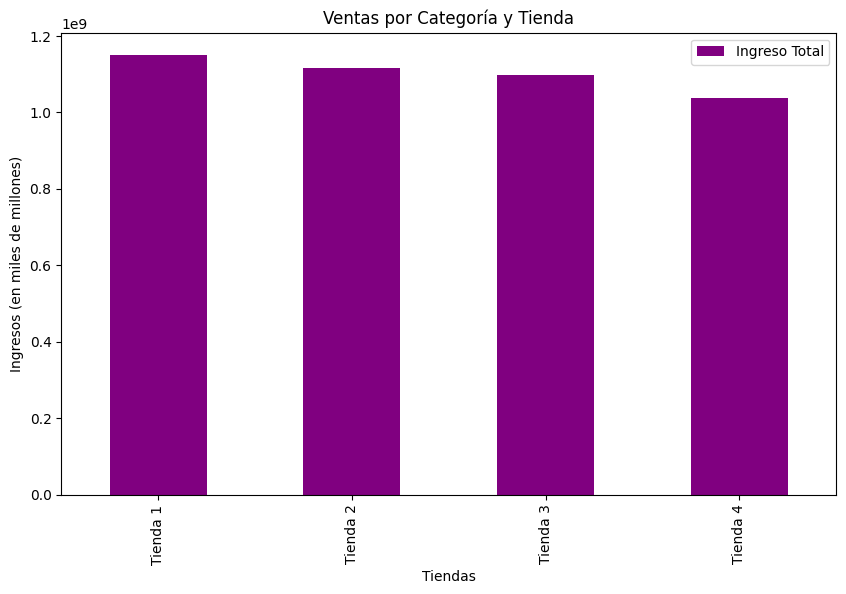

In [63]:
df_ingresos.plot(kind='bar',figsize=(10,6),color='purple', xlabel='Tiendas', ylabel='Ingresos (en miles de millones)', title='Ventas por Categoría y Tienda')

## **Ventas por Categoría y Tienda**

<Axes: title={'center': 'Ventas por Categoría y Tienda'}, xlabel='Categoría', ylabel='Cantidad Vendida'>

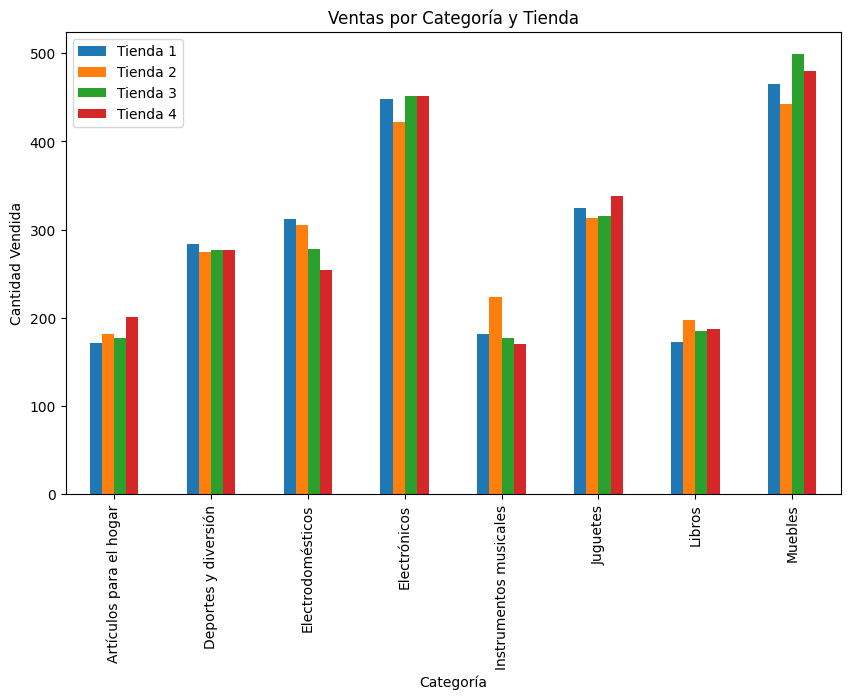

In [65]:
df_ventas_categorias.plot(kind='bar',figsize=(10,6), ylabel='Cantidad Vendida', title='Ventas por Categoría y Tienda')


## **Calificación Promedio por Tienda'**

<Axes: title={'center': 'Calificación Promedio por Tienda'}, xlabel='Tiendas', ylabel='Calificación'>

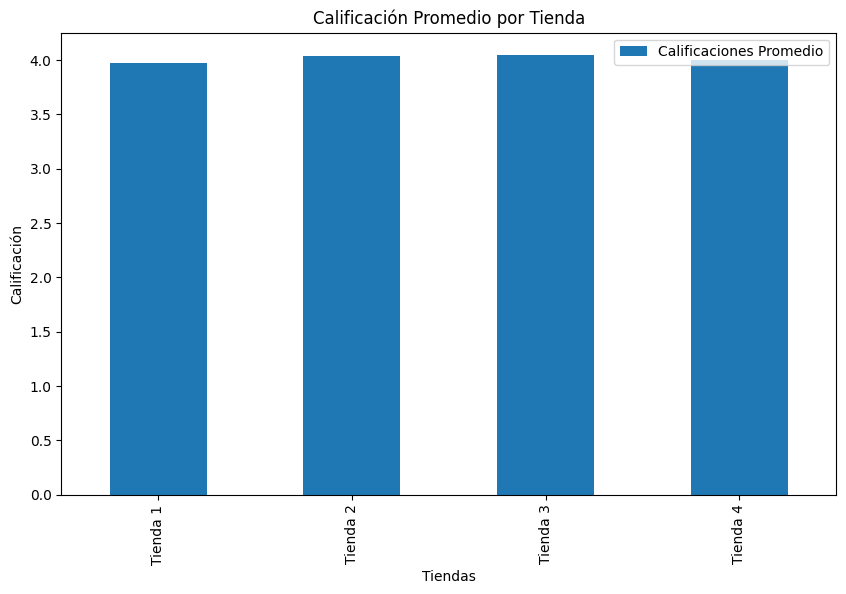

In [64]:
df_calificaciones.plot(kind='bar',figsize=(10,6), xlabel='Tiendas', ylabel='Calificación', title='Calificación Promedio por Tienda')

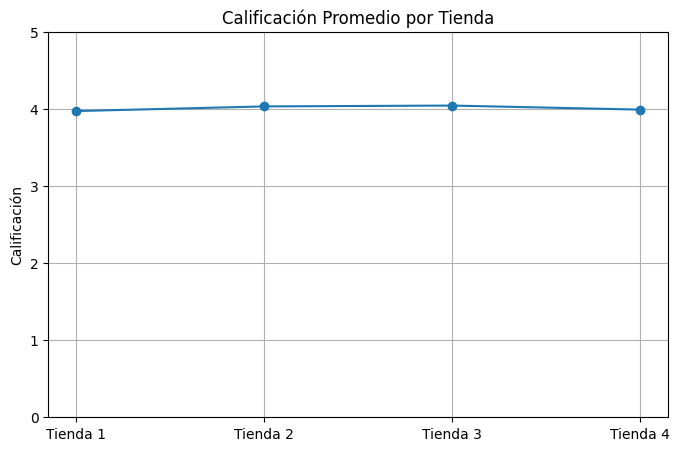

In [68]:
plt.figure(figsize=(8,5))
plt.plot(df_calificaciones.index,
         df_calificaciones["Calificaciones Promedio"],
         marker='o')

plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación")
plt.ylim(0,5)
plt.grid(True)
plt.show()

## **Costo de Envío Promedio por Tienda**

<Axes: title={'center': 'Costo de Envío Promedio por Tienda'}, xlabel='Tiendas', ylabel='Costo de Envío'>

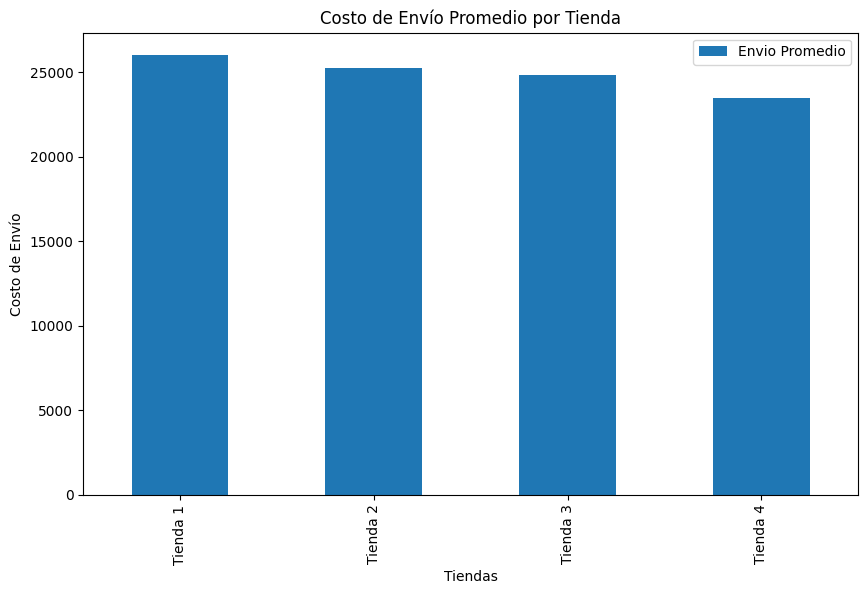

In [66]:
df_envios.plot(kind='bar',figsize=(10,6), xlabel='Tiendas', ylabel='Costo de Envío', title='Costo de Envío Promedio por Tienda')

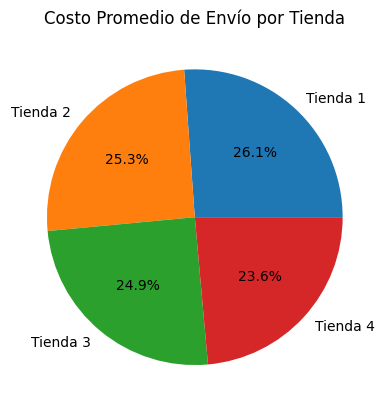

In [67]:
plt.figure()
plt.pie(envios, labels=nombres_tiendas, autopct='%1.1f%%')
plt.title("Costo Promedio de Envío por Tienda")
plt.show()

# **INFORME FINAL**

## **INTRODUCCIÓN**

El presente análisis tiene como objetivo evaluar el desempeño de las cuatro tiendas, con el fin de recomendar cuál de ellas debería vender el Sr. Juan para invertir en un nuevo negocio.

Para ello, se analizaron los siguientes indicadores clave:
*   Ingresos totales
*   Categorías más y menos vendidas
*   Calificación promedio de los clientes
*   Productos más y menos vendidos
*   Costo promedio de envío

## **ANÁLISIS**


***Ingresos Totales***

La Tienda 1 presenta el mayor ingreso total, seguida por la Tienda 2.
Las Tiendas 3 y 4 registran los menores ingresos, siendo Tienda 4 la de menor facturación.

Esto indica que Tienda 1 y 2 tienen mayor volumen de ventas y mejor desempeño comercial general.

***Ventas por Categoría***

En todas las tiendas, la categoría con mayor volumen es Muebles, seguida por Electrónicos.

Sin embargo, las tiendas con menor volumen general (Tienda 3 y 4) presentan menor rotación en categorías estratégicas como Electrodomésticos y Deportes.

***Calificación Promedio***

Si Tienda 2 y Tienda 3 mantienen calificaciones competitivas, significa que su menor ingreso no necesariamente está relacionado con insatisfacción del cliente.
Sin embargo, una tienda que combine bajo ingreso y baja calificación representa una doble debilidad estratégica. Dicha combinación sería el principal foco de preocupación.

***Productos Más y Menos Vendidos***

Los productos más vendidos se concentran en categorías de alta demanda como Muebles y Electrónicos.

Sin embargo, las tiendas con menor facturación muestran menor diversificación en productos líderes.

***Costo Promedio de Envío***

El costo de envío promedio es relativamente similar entre tiendas.
No representa una ventaja competitiva clara para las tiendas con menor desempeño.


## **CONCLUSIÓN**

Con base en el análisis realizado, la **Tienda 4** se posiciona como la unidad con menor desempeño general, al registrar el nivel más bajo de ingresos totales y menor rotación en categorías estratégicas como Electrodomésticos y Deportes. Aunque presenta el costo promedio de envío más bajo, esta diferencia no es lo suficientemente significativa como para representar una ventaja competitiva clara frente a las demás tiendas. Considerando el volumen de ventas, el desempeño por categorías y el impacto limitado del costo logístico, Tienda 4 aparece como la candidata más razonable en caso de que se requiera tomar una decisión estratégica como la venta o reestructuración de una sucursal.
